In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [13]:
df = pd.read_csv('../datas/emprego.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [14]:
df.dropna(inplace=True)

In [15]:
x = df[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']]
y = df['salary']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=18)

In [17]:
from sklearn.neural_network import MLPRegressor

In [18]:
modelo = MLPRegressor(
    hidden_layer_sizes=(10, 5),
    activation='relu',
    solver='adam',
    learning_rate='constant',
    learning_rate_init=0.001,
    max_iter=5000,
    shuffle=True,
    random_state=20,
    validation_fraction=0.2,
    verbose=True)

In [19]:
modelo.fit(X_train, y_train)

Iteration 1, loss = 43757781860.27662659
Iteration 2, loss = 43757506452.55448914
Iteration 3, loss = 43757230708.39151764
Iteration 4, loss = 43756958715.01194763
Iteration 5, loss = 43756689958.90249634
Iteration 6, loss = 43756424003.23930359
Iteration 7, loss = 43756160563.65511322
Iteration 8, loss = 43755900387.16944885
Iteration 9, loss = 43755641953.47584534
Iteration 10, loss = 43755386092.88519287
Iteration 11, loss = 43755130944.63081360
Iteration 12, loss = 43754877064.11284637
Iteration 13, loss = 43754624926.44934082
Iteration 14, loss = 43754373297.13463593
Iteration 15, loss = 43754121606.94623566
Iteration 16, loss = 43753869891.39821625
Iteration 17, loss = 43753618446.91934967
Iteration 18, loss = 43753367286.43865967
Iteration 19, loss = 43753116127.54254150
Iteration 20, loss = 43752864551.07371521
Iteration 21, loss = 43752612702.70769501
Iteration 22, loss = 43752360657.42243195
Iteration 23, loss = 43752108415.61581421
Iteration 24, loss = 43751855726.07202911
I

C:\Users\Igor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(10, 5), max_iter=5000, random_state=20,
             validation_fraction=0.2, verbose=True)

Text(0, 0.5, 'Loss')

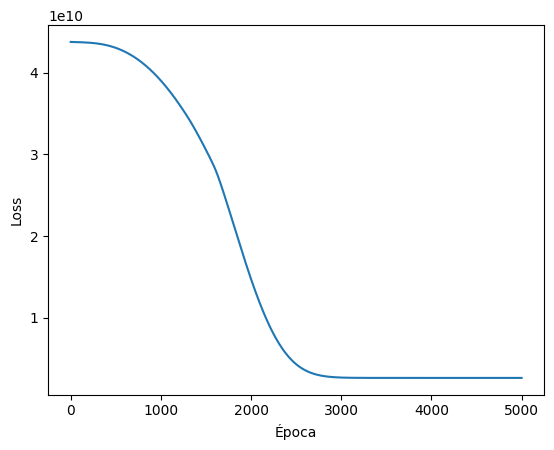

In [20]:
plt.plot(modelo.loss_curve_)
plt.xlabel('Época')
plt.ylabel('Loss')

In [21]:
print('Dados de treinamento')

predicao = modelo.predict(X_train)

print('r2:', metrics.r2_score(y_train, predicao))
print('MAE:', metrics.mean_absolute_error(y_train, predicao))
print('MSE:', metrics.mean_squared_error(y_train, predicao))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predicao)))

Dados de treinamento
r2: 0.03532595062344501
MAE: 50594.41213548546
MSE: 5301321364.501808
RMSE: 72810.17349589142


In [22]:
print('Dados de teste')

predicao = modelo.predict(X_test)

print('r2:', metrics.r2_score(y_test, predicao))
print('MAE:', metrics.mean_absolute_error(y_test, predicao))
print('MSE:', metrics.mean_squared_error(y_test, predicao))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicao)))

Dados de teste
r2: -0.02446083379879016
MAE: 60121.60739473957
MSE: 16303125019.790754
RMSE: 127683.69128354159
